In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
claims = pd.read_csv('claims_cleaned.csv')

In [36]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92376 entries, 0 to 92375
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   basementEnclosureCrawlspaceType     92376 non-null  int64  
 1   elevatedBuildingIndicator           92376 non-null  int64  
 2   ratedFloodZone                      92376 non-null  int64  
 3   numberOfFloorsInTheInsuredBuilding  92376 non-null  float64
 4   occupancyType                       92376 non-null  int64  
 5   floodWaterDuration                  92376 non-null  float64
 6   waterDepth                          92376 non-null  float64
 7   countyCode                          92376 non-null  int64  
 8   damageRatio                         92376 non-null  float64
 9   buildingAgeAtLoss                   92376 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 7.0 MB


In [37]:
claims.describe()

,basementEnclosureCrawlspaceType,elevatedBuildingIndicator,ratedFloodZone,numberOfFloorsInTheInsuredBuilding,occupancyType,floodWaterDuration,waterDepth,countyCode,damageRatio,buildingAgeAtLoss
count,92376.000000,92376.000000,92376.000000,92376.000000,92376.000000,92376.000000,92376.000000,92376.000000,92376.000000,92376.000000
mean,1.345847,0.274379,29.709686,2.162607,0.260100,0.899931,2.485720,936.746785,0.254978,47.068936
std,0.889042,0.446203,17.086462,0.762053,0.800836,19.621714,2.144784,419.254288,0.267815,25.162804
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.583333,0.000000,0.000000,1.000000
25%,1.000000,0.000000,18.000000,2.000000,0.000000,0.000000,1.000000,630.000000,0.054562,30.000000
50%,2.000000,0.000000,31.000000,2.000000,0.000000,0.000000,1.666667,991.000000,0.138401,46.000000
75%,2.000000,1.000000,31.000000,3.000000,0.000000,0.000000,3.416667,1144.000000,0.386958,61.000000
max,3.000000,1.000000,61.000000,6.000000,11.000000,999.000000,14.916667,1800.000000,1.000000,255.000000


### Plots

#### Plot pairwise correlation

In [38]:
# List categorical columns
categorical_cols = ['ratedFloodZone', 'causeOfDamage', 'occupancyType', 
                    'countyCode', 'elevatedBuildingIndicator', 'unknownCauseOfDamage']
# List numerical columns
numerical_cols = [col for col in claims.columns if col not in categorical_cols]

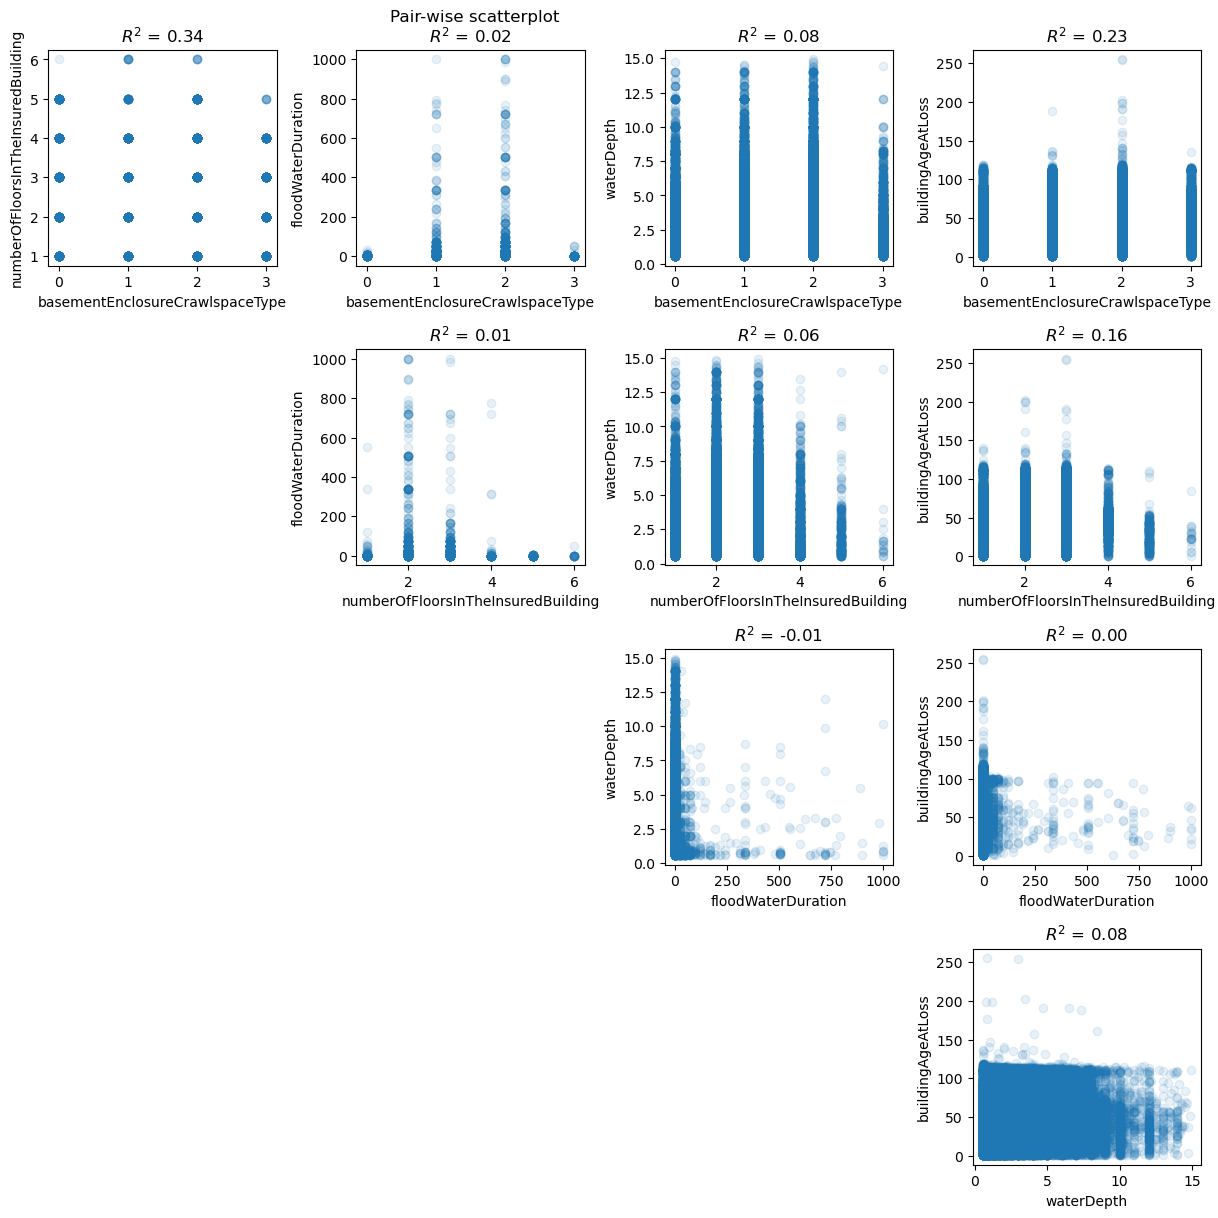

In [39]:
plt.figure(figsize = (15,15))
numerical_cols.remove('damageRatio')  # Exclude damageRatio from scatter plots
num_plots = len(numerical_cols)**2
dim = int(np.ceil(np.sqrt(num_plots)))
i = 0
plotted = []
for a in numerical_cols:
    for b in numerical_cols:
        i+=1
        plotted += [(b, a)]
        if (a,b) not in plotted:
            plt.subplot(dim, dim, i)
            plt.scatter(claims[a], claims[b], marker='o', alpha=0.1)
            plt.xlabel(a)
            plt.ylabel(b)
            corr = claims[[a, b]].corr().to_numpy()[0,1]
            plt.title(f'$R^2$ = {corr:.2f}')

plt.suptitle('Pair-wise scatterplot', fontsize = 12)
plt.tight_layout()

#### Plot distribution for all fields

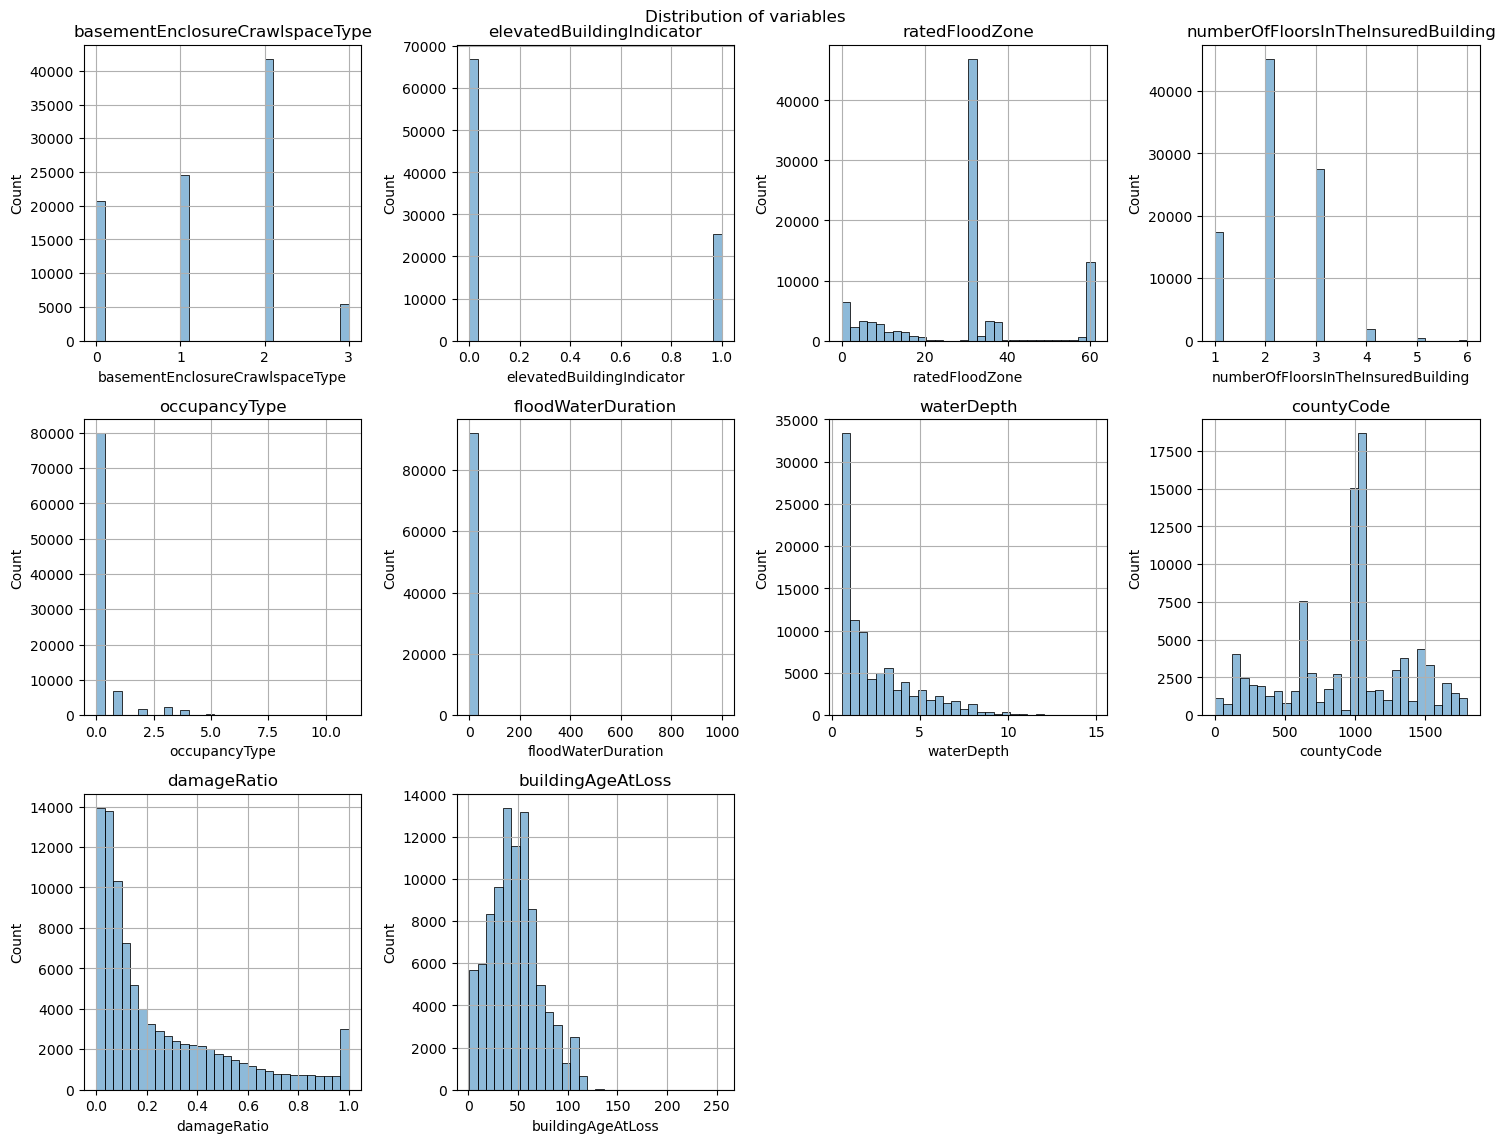

In [40]:
plt.figure(figsize = (15,15))
num_plots = len(claims.columns)
dim = int(np.ceil(np.sqrt(num_plots)))
i = 0
for col in claims.columns:
        i+=1
        plt.subplot(dim, dim, i)
        plt.grid()
        sns.histplot(claims[col], bins = 30, alpha = 0.5)
        plt.title(col)
plt.suptitle('Distribution of variables')
plt.tight_layout()


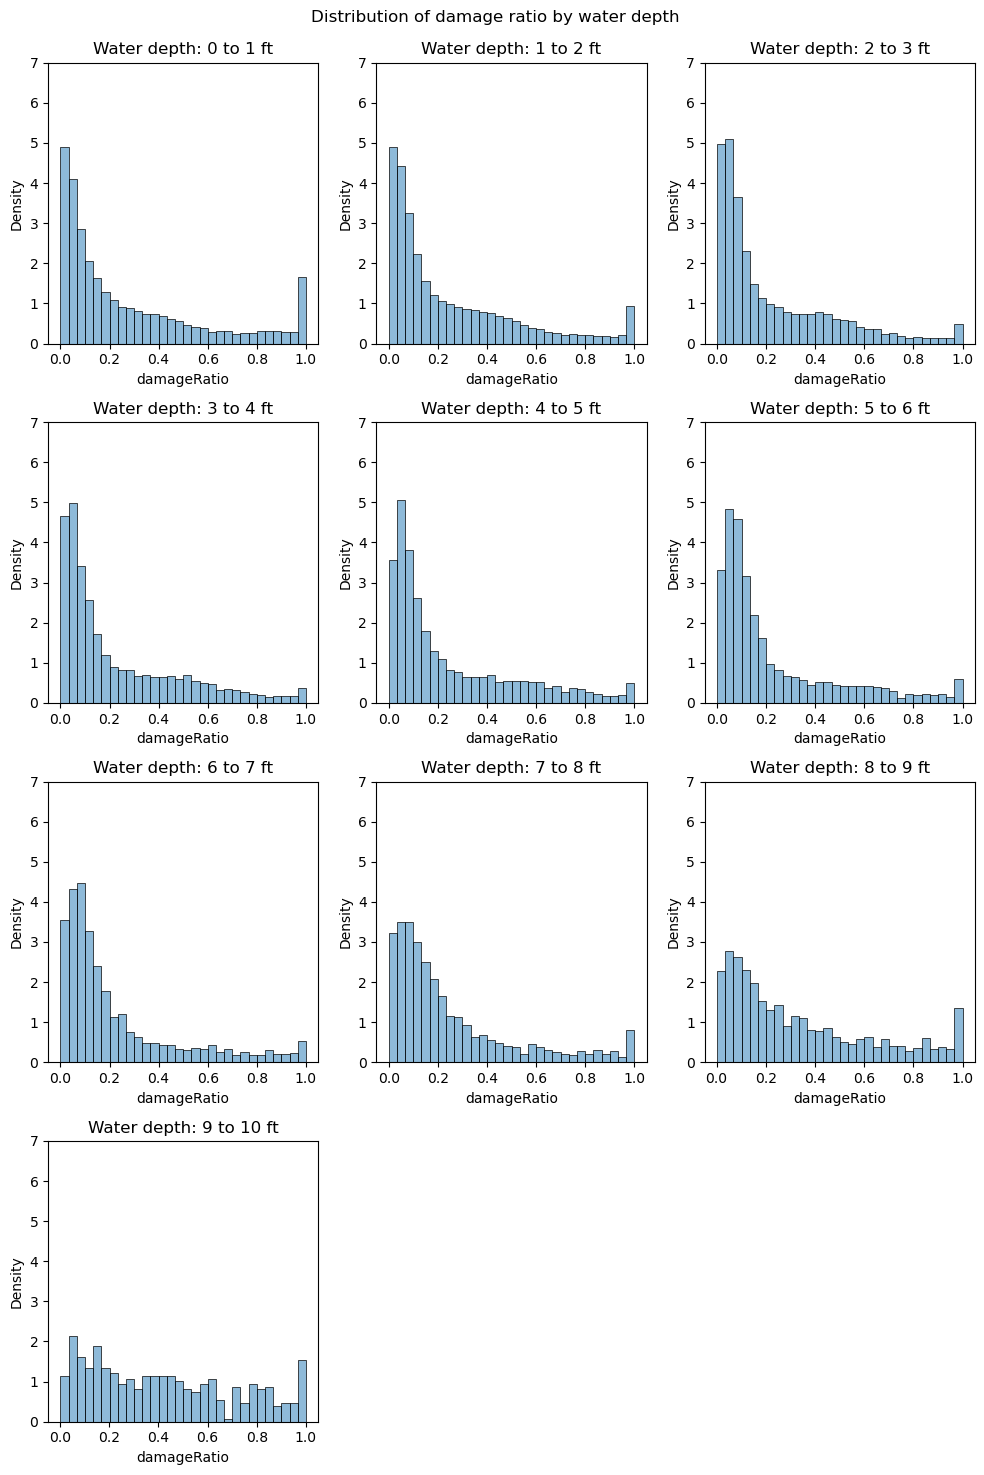

In [41]:
plt.figure(figsize=(10, 15))
for depth in range(0,10):
    plt.subplot(4, 3, depth+1)
    depth_df = claims[(claims['waterDepth'] >= depth) & (claims['waterDepth'] < depth + 1)]
    sns.histplot(depth_df['damageRatio'], stat = 'density', bins=30, alpha=0.5)
    plt.title(f'Water depth: {depth} to {depth + 1} ft')
    plt.ylim(0, 7)

plt.suptitle('Distribution of damage ratio by water depth\n')
plt.tight_layout()
